In [1]:
import pandas as pd
import numpy as np 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pylab import rcParams

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier

In [2]:
x_train = pd.read_pickle('../data/titanic_x_train.pkl')
y_train = pd.read_pickle('../data/titanic_y_train.pkl')

x_valid = pd.read_pickle('../data/titanic_x_valid.pkl')
y_valid = pd.read_pickle('../data/titanic_y_valid.pkl')

## Масштабирование признаков с помощью RobustScaler

In [3]:
from sklearn.preprocessing import RobustScaler
# минимизирует значение выбросов в данные

cols_for_scale = ['Age', 'SibSp', 'Parch', 'Fare']

scaler = RobustScaler()
x_train[cols_for_scale] = scaler.fit_transform(x_train[cols_for_scale])
x_valid[cols_for_scale] = scaler.fit_transform(x_valid[cols_for_scale])

x_train.describe()

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.00000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,0.342814,-0.017145,0.553892,0.372754,0.787570,0.17515,0.086826,0.738024,0.227545,0.211078,0.561377
std,0.475006,1.000766,1.185279,0.795588,2.285892,0.38038,0.281791,0.440039,0.419561,0.408379,0.496590
min,0.000000,-2.252240,0.000000,0.000000,-0.637874,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-0.592240,0.000000,0.000000,-0.286822,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,0.407760,1.000000,0.000000,0.713178,0.00000,0.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.869299,8.000000,6.000000,22.056664,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


## Классификация с помощью KNN

In [4]:
k_vals = np.arange(2, 10)

In [5]:
accuracy_valid = []
accuracy_train = []

for val in k_vals:
    clf = KNeighborsClassifier(n_neighbors=val)
    clf.fit(x_train, y_train)
    
    y_pred = clf.predict(x_valid)
    y_pred_train = clf.predict(x_train)
    
    acc_valid = accuracy_score(y_valid, y_pred)
    acc_train = accuracy_score(y_train, y_pred_train)
    
    accuracy_train.append(acc_train)
    accuracy_valid.append(acc_valid)
    
    print(f"n_neighbors = {val}\n\tacc_valid - {acc_valid}\n\tacc_train - {acc_train}\n")

n_neighbors = 2
	acc_valid - 0.8026905829596412
	acc_train - 0.8772455089820359

n_neighbors = 3
	acc_valid - 0.8071748878923767
	acc_train - 0.875748502994012

n_neighbors = 4
	acc_valid - 0.7757847533632287
	acc_train - 0.8458083832335329

n_neighbors = 5
	acc_valid - 0.8071748878923767
	acc_train - 0.8637724550898204

n_neighbors = 6
	acc_valid - 0.8251121076233184
	acc_train - 0.8353293413173652

n_neighbors = 7
	acc_valid - 0.7982062780269058
	acc_train - 0.8323353293413174

n_neighbors = 8
	acc_valid - 0.7668161434977578
	acc_train - 0.8173652694610778

n_neighbors = 9
	acc_valid - 0.7847533632286996
	acc_train - 0.8173652694610778



Text(0, 0.5, 'Accuracy')

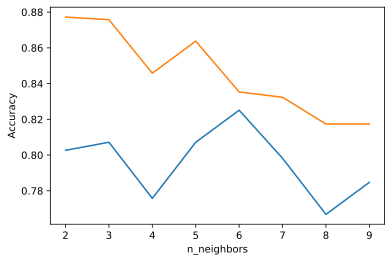

In [6]:
plt.plot(k_vals, accuracy_valid, label='valid')
plt.plot(k_vals, accuracy_train, label='train')

plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')

In [7]:
clf = KNeighborsClassifier(n_neighbors=6)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_valid)
accuracy_score(y_pred, y_valid)

0.8251121076233184

## Точность и полнота

In [8]:
y_valid.value_counts(normalize=True)

0    0.600897
1    0.399103
Name: Survived, dtype: float64

In [9]:
from sklearn.metrics import confusion_matrix

# Просматриваем в каких случаях предугадано правильно и нет
confusion_matrix(y_valid, y_pred)

array([[123,  11],
       [ 28,  61]], dtype=int64)

In [10]:
# True Negitive
# Когда правильно предсказан 0
TN = ((y_valid == 0) & (y_pred == 0)).sum()
TN

123

In [11]:
# False Negitive
# Когда предсказали 0, но это было неправильно
FN = ((y_valid == 1) & (y_pred == 0)).sum()
FN

28

In [12]:
# False Positive
# Когда предсказали 1, но это было неправильно
FP = ((y_valid == 0) & (y_pred == 1)).sum()
FP

11

In [13]:
# True Positive
# Когда правильно предсказан 1
TP = ((y_valid == 1) & (y_pred == 1)).sum()
TP

61

In [14]:
# Normalized confusion matrix
cm = confusion_matrix(y_valid, y_pred) / y_valid.shape[0]
cm

array([[0.55156951, 0.04932735],
       [0.12556054, 0.2735426 ]])

In [15]:
# Точность
precision = TP / (TP + FP)
precision

0.8472222222222222

In [16]:
from sklearn.metrics import precision_score

precision_score(y_valid, y_pred)

0.8472222222222222

In [17]:
# Полнота
recall = TP / (TP + FN)
recall

0.6853932584269663

In [18]:
from sklearn.metrics import recall_score

recall_score(y_valid, y_pred)

0.6853932584269663

## F1 Score

In [19]:
# Чем ближе к 1 тем лучше
f1 = 2 * (precision * recall) / (precision + recall)
f1

0.7577639751552795

In [20]:
from sklearn.metrics import f1_score

f1_score(y_valid, y_pred)

0.7577639751552795

## AUC

In [21]:
# Arrea under curve

y_pred_proba = clf.predict_proba(x_valid)
y_pred_proba

array([[0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.16666667, 0.83333333],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.83333333, 0.16666667],
       [0.5       , 0.5       ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.83333333, 0.16666667],
       [0.66666667, 0.33333333],
       [0.5       , 0.5       ],
       [0.

In [22]:
y_pred_proba = y_pred_proba[:, 1]
y_pred_proba

array([0.33333333, 0.16666667, 0.        , 1.        , 0.5       ,
       1.        , 0.66666667, 0.16666667, 0.5       , 0.83333333,
       0.33333333, 0.16666667, 0.16666667, 0.        , 0.16666667,
       1.        , 0.33333333, 0.66666667, 0.        , 0.5       ,
       0.16666667, 0.5       , 0.33333333, 0.        , 0.        ,
       0.16666667, 0.33333333, 0.16666667, 0.33333333, 0.5       ,
       0.16666667, 0.66666667, 0.33333333, 0.5       , 0.        ,
       0.33333333, 0.5       , 0.66666667, 0.5       , 0.16666667,
       0.33333333, 0.16666667, 0.16666667, 0.16666667, 0.5       ,
       0.16666667, 0.16666667, 0.        , 0.16666667, 0.5       ,
       0.33333333, 0.5       , 0.        , 0.66666667, 0.        ,
       0.83333333, 0.33333333, 0.83333333, 1.        , 0.5       ,
       0.16666667, 1.        , 0.66666667, 0.5       , 0.16666667,
       0.66666667, 0.33333333, 0.16666667, 0.33333333, 1.        ,
       0.83333333, 0.83333333, 0.33333333, 1.        , 0.16666

Text(0, 0.5, 'Количество')

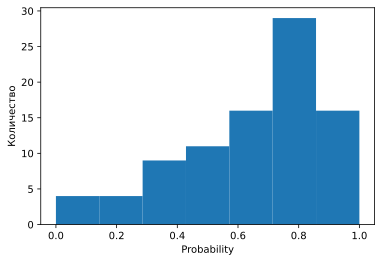

In [23]:
plt.hist(y_pred_proba[y_valid == 1], bins=7)
plt.xlabel('Probability')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

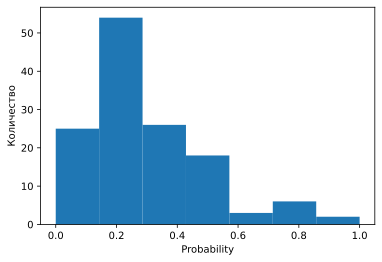

In [24]:
plt.hist(y_pred_proba[y_valid == 0], bins=7)
plt.xlabel('Probability')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

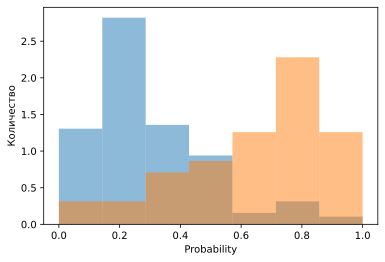

In [25]:
plt.hist(y_pred_proba[y_valid == 0], bins=7, density=True, alpha=0.5, label='not survived')
plt.hist(y_pred_proba[y_valid == 1], bins=7, density=True, alpha=0.5, label='survived')

plt.xlabel('Probability')
plt.ylabel('Количество')

In [26]:
from sklearn.metrics import roc_curve

# pos_label=1 - класс один считаем позитивным
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba, pos_label=1)

In [27]:
fpr

array([0.        , 0.01492537, 0.05970149, 0.08208955, 0.21641791,
       0.41044776, 0.81343284, 1.        ])

In [28]:
tpr

array([0.        , 0.17977528, 0.50561798, 0.68539326, 0.80898876,
       0.91011236, 0.95505618, 1.        ])

In [29]:
thresholds

array([2.        , 1.        , 0.83333333, 0.66666667, 0.5       ,
       0.33333333, 0.16666667, 0.        ])

In [30]:
# FPR для порога == 1
((y_valid == 0) & (y_pred == 1) & (y_pred_proba >= 1) ).sum() / (y_valid == 0).sum()

0.014925373134328358

In [31]:
# TPR для порога == 1
((y_valid == 1) & (y_pred == 1) & (y_pred_proba >= 1)).sum() / (y_valid == 1).sum()

0.1797752808988764

Text(0.5, 1.0, 'Receiver operating characteristic (ROC)')

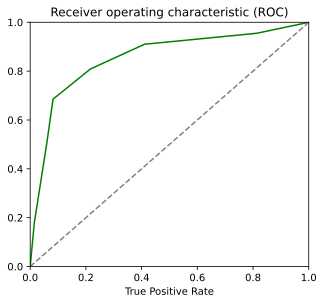

In [32]:
rcParams['figure.figsize'] = 5, 4.5
plt.plot(fpr, tpr, color='green', label='ROC curve')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')

In [33]:
# Чем больше площаль под кривой, тем лучше разделяющая способность модели
from sklearn.metrics import roc_auc_score

roc_auc_score(y_valid, y_pred_proba)

0.8553580412544022